In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score


## Loading The data

In [2]:
df = pd.read_csv("input/summer-products-with-rating-and-performance_2020-08.csv")
df.head()

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   
2            EUR         100               0    3.57            14   
3            EUR        5000               1    4.03           579   
4            EUR         100               1    3.10            20   

   rating_five_count  ...  merchant_rating_count  merchant_rating  \
0               26.0  ...                    568         4.128521   
1             2269.0  ...                  17752         3.899673   
2                5.0  ...                    295         3.989831   
3              295.0  ...                  23832         4.020435   
4                6.0  ...                  14482         4.001588   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   
2  5d464a1ffdf7bc44ee933c65                             0   
3  58cfdefdacb37b556efdff7c                             0   
4  5ab3b592c3911a095ad5dadb                             0   

   merchant_profile_picture                                      product_url  \
0                       NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                       NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   
2                       NaN  https://www.wish.com/c/5ea10e2c617580260d55310a   
3                       NaN  https://www.wish.com/c/5cedf17ad1d44c52c59e4aca   
4                       NaN  https://www.wish.com/c/5ebf5819ebac372b070b0e70   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   
2  https://contestimg.wish.com/api/webimage/5ea10...   
3  https://contestimg.wish.com/api/webimage/5cedf...   
4  https://contestimg.wish.com/api/webimage/5ebf5...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08  
2  5ea10e2c617580260d55310a  summer     2020-08  
3  5cedf17ad1d44c52c59e4aca  summer     2020-08  
4  5ebf5819ebac372b070b0e70  summer     2020-08  

[5 rows x 43 columns]

## Some Basic Data Exploration

In [3]:
df.head().T

0  \
title                         2020 Summer Vintage Flamingo Print  Pajamas Se...   
title_orig                    2020 Summer Vintage Flamingo Print  Pajamas Se...   
price                                                                        16   
retail_price                                                                 14   
currency_buyer                                                              EUR   
units_sold                                                                  100   
uses_ad_boosts                                                                0   
rating                                                                     3.76   
rating_count                                                                 54   
rating_five_count                                                            26   
rating_four_count                                                             8   
rating_three_count                                                           10   
rating_two_count                                                              1   
rating_one_count                                                              9   
badges_count                                                                  0   
badge_local_product                                                           0   
badge_product_quality                                                         0   
badge_fast_shipping                                                           0   
tags                          Summer,Fashion,womenunderwearsuit,printedpajam...   
product_color                                                             white   
product_variation_size_id                                                     M   
product_variation_inventory                                                  50   
shipping_option_name                                         Livraison standard   
shipping_option_price                                                         4   
shipping_is_express                                                           0   
countries_shipped_to                                                         34   
inventory_total                                                              50   
has_urgency_banner                                                            1   
urgency_text                                                 Quantité limitée !   
origin_country                                                               CN   
merchant_title                                                         zgrdejia   
merchant_name                                                          zgrdejia   
merchant_info_subtitle                                              (568 notes)   
merchant_rating_count                                                       568   
merchant_rating                                                         4.12852   
merchant_id                                            595097d6a26f6e070cb878d1   
merchant_has_profile_picture                                                  0   
merchant_profile_picture                                                    NaN   
product_url                     https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
product_picture               https://contestimg.wish.com/api/webimage/5e9ae...   
product_id                                             5e9ae51d43d6a96e303acdb0   
theme                                                                    summer   
crawl_month                                                             2020-08   

                                                                              1  \
title                         SSHOUSE Summer Casual Sleeveless Soirée Party ...   
title_orig                     Women's Casual Summer Sleeveless Sexy Mini Dress   
price                                                                         8   
retail_price                                                                 22   
currency_b

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
df.describe()

price  retail_price     units_sold  uses_ad_boosts       rating  \
count  1573.000000   1573.000000    1573.000000     1573.000000  1573.000000   
mean      8.325372     23.288620    4339.005086        0.432931     3.820896   
std       3.932030     30.357863    9356.539302        0.495639     0.515374   
min       1.000000      1.000000       1.000000        0.000000     1.000000   
25%       5.810000      7.000000     100.000000        0.000000     3.550000   
50%       8.000000     10.000000    1000.000000        0.000000     3.850000   
75%      11.000000     26.000000    5000.000000        1.000000     4.110000   
max      49.000000    252.000000  100000.000000        1.000000     5.000000   

       rating_count  rating_five_count  rating_four_count  rating_three_count  \
count   1573.000000        1528.000000        1528.000000         1528.000000   
mean     889.659250         442.263743         179.599476          134.549738   
std     1983.928834         980.203270         400.516231          311.690656   
min        0.000000           0.000000           0.000000            0.000000   
25%       24.000000          12.000000           5.000000            4.000000   
50%      150.000000          79.000000          31.500000           24.000000   
75%      855.000000         413.500000         168.250000          129.250000   
max    20744.000000       11548.000000        4152.000000         3658.000000   

       rating_two_count  ...  badge_fast_shipping  \
count       1528.000000  ...          1573.000000   
mean          63.711387  ...             0.012715   
std          151.343933  ...             0.112075   
min            0.000000  ...             0.000000   
25%            2.000000  ...             0.000000   
50%           11.000000  ...             0.000000   
75%           62.000000  ...             0.000000   
max         2003.000000  ...             1.000000   

       product_variation_inventory  shipping_option_price  \
count                  1573.000000            1573.000000   
mean                     33.081373               2.345200   
std                      21.353137               1.024371   
min                       1.000000               1.000000   
25%                       6.000000               2.000000   
50%                      50.000000               2.000000   
75%                      50.000000               3.000000   
max                      50.000000              12.000000   

       shipping_is_express  countries_shipped_to  inventory_total  \
count          1573.000000           1573.000000      1573.000000   
mean              0.002543             40.456453        49.821360   
std               0.050379             20.301203         2.562799   
min               0.000000              6.000000         1.000000   
25%               0.000000             31.000000        50.000000   
50%               0.000000             40.000000        50.000000   
75%               0.000000             43.000000        50.000000   
max               1.000000            140.000000        50.000000   

       has_urgency_banner  merchant_rating_count  merchant_rating  \
count               473.0           1.573000e+03      1573.000000   
mean                  1.0           2.649583e+04         4.032345   
std                   0.0           7.847446e+04         0.204768   
min                   1.0           0.000000e+00         2.333333   
25%                   1.0           1.987000e+03         3.917353   
50%                   1.0           7.936000e+03         4.040650   
75%                   1.0           2.456400e+04         4.161797   
max                   1.0           2.174765e+06         5.000000   

       merchant_has_profile_picture  
count                   1573.000000  
mean                       0.143675  
std                        0.350871  
min                        0.000000  
25%                        0.000000  
50%                        0.000000  
75%                     

In [6]:
df.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

## Dropping Some Columns
Dropping the columns with many unique categories coz they wont be very helpful and they will just add many dimensions to the data.

In [7]:
max_unique = 60
high_unique = [col for col in df.select_dtypes(exclude=np.number)
                   if df[col].nunique() > max_unique]
df = df.drop(columns=high_unique)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   rating_five_count             1528 non-null   float64
 8   rating_four_count             1528 non-null   float64
 9   rating_three_count            1528 non-null   float64
 10  rating_two_count              1528 non-null   float64
 11  rating_one_count              1528 non-null   float64
 12  badges_count                  1573 non-null   int64  
 13  bad

In [8]:
df.head().T

0                   1  \
price                                         16                   8   
retail_price                                  14                  22   
currency_buyer                               EUR                 EUR   
units_sold                                   100               20000   
uses_ad_boosts                                 0                   1   
rating                                      3.76                3.45   
rating_count                                  54                6135   
rating_five_count                             26                2269   
rating_four_count                              8                1027   
rating_three_count                            10                1118   
rating_two_count                               1                 644   
rating_one_count                               9                1077   
badges_count                                   0                   0   
badge_local_product                            0                   0   
badge_product_quality                          0                   0   
badge_fast_shipping                            0                   0   
product_variation_inventory                   50                  50   
shipping_option_name          Livraison standard  Livraison standard   
shipping_option_price                          4                   2   
shipping_is_express                            0                   0   
countries_shipped_to                          34                  41   
inventory_total                               50                  50   
has_urgency_banner                             1                   1   
urgency_text                  Quantité limitée !  Quantité limitée !   
origin_country                                CN                  CN   
merchant_rating_count                        568               17752   
merchant_rating                          4.12852             3.89967   
merchant_has_profile_picture                   0                   0   
theme                                     summer              summer   
crawl_month                              2020-08             2020-08   

                                               2                   3  \
price                                          8                   8   
retail_price                                  43                   8   
currency_buyer                               EUR                 EUR   
units_sold                                   100                5000   
uses_ad_boosts                                 0                   1   
rating                                      3.57                4.03   
rating_count                                  14                 579   
rating_five_count                              5                 295   
rating_four_count                              4                 119   
rating_three_count                             2                  87   
rating_two_count                               0                  42   
rating_one_count                               3                  36   
badges_count                                   0                   0   
badge_local_product                            0                   0   
badge_product_quality                          0                   0   
badge_fast_shipping                            0                   0   
product_variation_inventory                    1                  50   
shipping_option_name          Livraison standard  Livraison standard   
shipping_option_price                          3                   2   
shipping_is_express                            0                   0   
countries_shipped_to                          36                  41   
inventory_total                               50                  50   
has_urgency_banner                             1                 NaN   
urgency_text                  Quantité limitée !                 NaN   
origin_country

In [9]:
df['currency_buyer'].value_counts()

EUR    1573
Name: currency_buyer, dtype: int64

## Building correlation

In [10]:
corr = df.corr()
corr

price  retail_price  units_sold  \
price                         1.000000      0.304748   -0.024815   
retail_price                  0.304748      1.000000    0.012638   
units_sold                   -0.024815      0.012638    1.000000   
uses_ad_boosts               -0.073269     -0.035325   -0.016055   
rating                        0.053469      0.024106    0.039478   
rating_count                 -0.001911      0.053872    0.899464   
rating_five_count            -0.001800      0.053113    0.876231   
rating_four_count             0.000547      0.061300    0.891116   
rating_three_count           -0.012581      0.048548    0.894243   
rating_two_count             -0.010668      0.046051    0.866685   
rating_one_count              0.004193      0.051060    0.832816   
badges_count                  0.063542      0.019625    0.045402   
badge_local_product           0.069592      0.022677   -0.007544   
badge_product_quality         0.009512      0.000098    0.063187   
badge_fast_shipping           0.087336      0.032201   -0.000898   
product_variation_inventory   0.274819      0.118842    0.133846   
shipping_option_price         0.872580      0.262516   -0.030987   
shipping_is_express           0.146751     -0.010047   -0.008308   
countries_shipped_to         -0.033312      0.035599   -0.013553   
inventory_total              -0.168222     -0.003041    0.005608   
has_urgency_banner                 NaN           NaN         NaN   
merchant_rating_count        -0.023790      0.029159    0.272897   
merchant_rating               0.047121      0.054399    0.122504   
merchant_has_profile_picture  0.017612      0.030683    0.143529   

                              uses_ad_boosts    rating  rating_count  \
price                              -0.073269  0.053469     -0.001911   
retail_price                       -0.035325  0.024106      0.053872   
units_sold                         -0.016055  0.039478      0.899464   
uses_ad_boosts                      1.000000 -0.049410     -0.043936   
rating                             -0.049410  1.000000      0.054112   
rating_count                       -0.043936  0.054112      1.000000   
rating_five_count                  -0.044368  0.138416      0.983337   
rating_four_count                  -0.044739  0.100638      0.995923   
rating_three_count                 -0.042531  0.047221      0.981485   
rating_two_count                   -0.044983  0.004735      0.946133   
rating_one_count                   -0.041281 -0.031759      0.911414   
badges_count                        0.038173  0.201503      0.077648   
badge_local_product                 0.061471  0.005724     -0.002285   
badge_product_quality               0.001697  0.264360      0.082852   
badge_fast_shipping                 0.038265 -0.013413      0.044762   
product_variation_inventory        -0.135384  0.031954      0.134246   
shipping_option_price              -0.061495  0.067963     -0.005928   
shipping_is_express                -0.018641  0.024168     -0.001137   
countries_shipped_to               -0.017439  0.046423     -0.001843   
inventory_total                     0.042395 -0.053156      0.008076   
has_urgency_banner                       NaN       NaN           NaN   
merchant_rating_count               0.029735  0.033837      0.258168   
merchant_rating                    -0.022564  0.237305      0.141255   
merchant_has_profile_picture        0.004235  0.012585      0.155415   

                              rating_five_count  rating_four_count  \
price                                 -0.001800           0.000547   
retail_price                           0.053113           0.061300   
units_sold                             0.876231           0.891116   
uses_ad_boosts                        -0.044368          -0.044739   
rating                                 0.138416           0.100638   
rating_count                           0.983337           0.995923   
rating_five_count                      1.

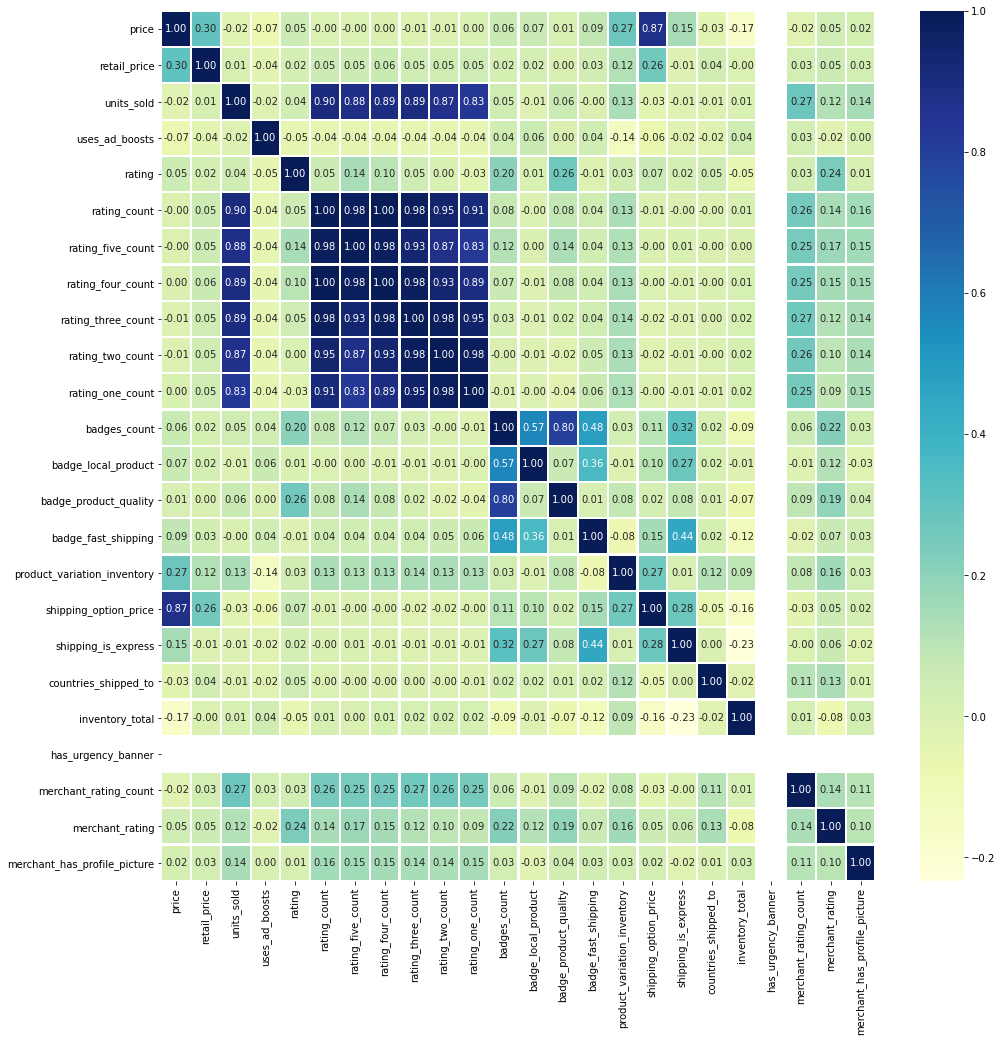

In [11]:
fig,ax = plt.subplots(figsize = (16,16))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=1.2,
                 fmt=".2f",
                 cmap="YlGnBu");

## Visualizing some columns

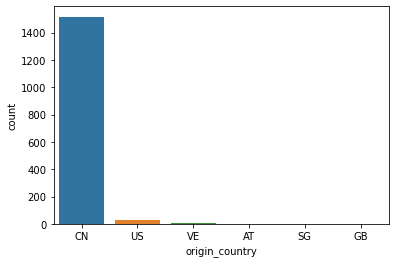

In [12]:
sns.countplot(df['origin_country']);

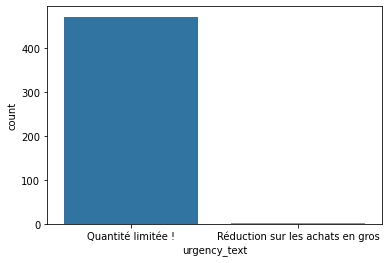

In [13]:
sns.countplot(df['urgency_text']);

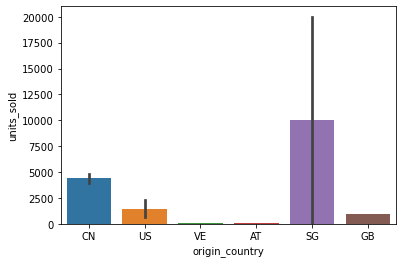

In [14]:
sns.barplot(x = df.origin_country,y = df.units_sold);

In [15]:
df['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

Dropping some more columns

In [16]:
df = df.drop(['crawl_month','origin_country','rating_count','shipping_option_name','urgency_text'],axis = 1)

In [17]:
df.head().T

0        1        2        3        4
price                              16        8        8        8     2.72
retail_price                       14       22       43        8        3
currency_buyer                    EUR      EUR      EUR      EUR      EUR
units_sold                        100    20000      100     5000      100
uses_ad_boosts                      0        1        0        1        1
rating                           3.76     3.45     3.57     4.03      3.1
rating_five_count                  26     2269        5      295        6
rating_four_count                   8     1027        4      119        4
rating_three_count                 10     1118        2       87        2
rating_two_count                    1      644        0       42        2
rating_one_count                    9     1077        3       36        6
badges_count                        0        0        0        0        0
badge_local_product                 0        0        0        0        0
badge_product_quality               0        0        0        0        0
badge_fast_shipping                 0        0        0        0        0
product_variation_inventory        50       50        1       50        1
shipping_option_price               4        2        3        2        1
shipping_is_express                 0        0        0        0        0
countries_shipped_to               34       41       36       41       35
inventory_total                    50       50       50       50       50
has_urgency_banner                  1        1        1      NaN        1
merchant_rating_count             568    17752      295    23832    14482
merchant_rating               4.12852  3.89967  3.98983  4.02043  4.00159
merchant_has_profile_picture        0        0        0        0        0
theme                          summer   summer   summer   summer   summer

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1528 non-null   float64
 7   rating_four_count             1528 non-null   float64
 8   rating_three_count            1528 non-null   float64
 9   rating_two_count              1528 non-null   float64
 10  rating_one_count              1528 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

# LabelEncoding 'currency_buyer'& 'theme' columns

In [19]:
le = LabelEncoder()
df['currency_buyer'] = le.fit_transform(df['currency_buyer'])
df['theme'] = le.fit_transform(df['theme'])

Checking all the columns with Missing values

In [20]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
has_urgency_banner


In [21]:
df['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

filling 'has_urgency_banner' column with 0 

In [22]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

filling all the other columns with meadian

In [23]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            df[label] = content.fillna(content.median())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   int64  
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1573 non-null   float64
 7   rating_four_count             1573 non-null   float64
 8   rating_three_count            1573 non-null   float64
 9   rating_two_count              1573 non-null   float64
 10  rating_one_count              1573 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

In [25]:
df.head()

price  retail_price  currency_buyer  units_sold  uses_ad_boosts  rating  \
0  16.00            14               0         100               0    3.76   
1   8.00            22               0       20000               1    3.45   
2   8.00            43               0         100               0    3.57   
3   8.00             8               0        5000               1    4.03   
4   2.72             3               0         100               1    3.10   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1             2269.0             1027.0              1118.0             644.0   
2                5.0                4.0                 2.0               0.0   
3              295.0              119.0                87.0              42.0   
4                6.0                4.0                 2.0               2.0   

   ...  product_variation_inventory  shipping_option_price  \
0  ...                           50                      4   
1  ...                           50                      2   
2  ...                            1                      3   
3  ...                           50                      2   
4  ...                            1                      1   

   shipping_is_express  countries_shipped_to  inventory_total  \
0                    0                    34               50   
1                    0                    41               50   
2                    0                    36               50   
3                    0                    41               50   
4                    0                    35               50   

   has_urgency_banner  merchant_rating_count  merchant_rating  \
0                 1.0                    568         4.128521   
1                 1.0                  17752         3.899673   
2                 1.0                    295         3.989831   
3                 0.0                  23832         4.020435   
4                 1.0                  14482         4.001588   

   merchant_has_profile_picture  theme  
0                             0      0  
1                             0      0  
2                             0      0  
3                             0      0  
4                             0      0  

[5 rows x 25 columns]

In [26]:
df.isna().sum()

price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
theme                           0
dtype: int64

# Splitting the data into Training and Testing sets

In [27]:
x = df.drop('units_sold',axis = 1)
y = df['units_sold']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

# Building the models
# RandomForest

In [30]:
model = RandomForestRegressor(n_estimators = 1000,random_state = 42)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [31]:
model.score(x_test,y_test)

0.8751199031007543

# LinearRegression

In [32]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [33]:
model1.score(x_test,y_test)

0.8286819895435132

In [34]:
scores = pd.DataFrame({'RandomForest': model.score(x_test,y_test),
                       'LinearRegression': model1.score(x_test,y_test)},
                        index = [0])


# Plotting the scores of both the model

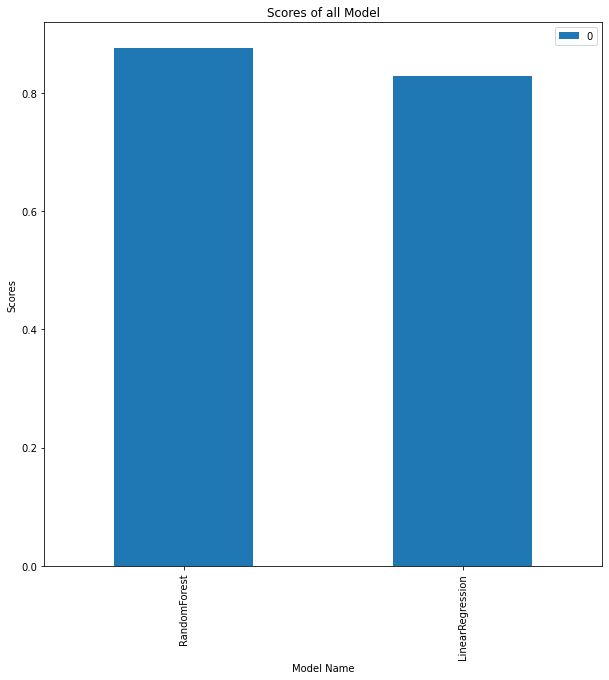

In [36]:
scores.T.plot(kind = 'bar',
              figsize = (10,10))
plt.title('Scores of all Model')
plt.xlabel('Model Name')
plt.ylabel('Scores');